In [1]:
!pip install split-folders
!pip install mplcyberpunk
!pip install split-folders

In [2]:
from IPython.display import clear_output

In [3]:
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pathlib, os, random, mplcyberpunk
path="/content/drive/MyDrive/TB_Chest_Radiography_Database"
base_path = pathlib.Path(path)
base_path

PosixPath('/content/drive/MyDrive/TB_Chest_Radiography_Database')

In [14]:
import splitfolders
splitfolders.ratio(base_path, output='X_ray_Imgs', seed=123, ratio=(0.7, 0.15, 0.15),group_prefix=None)

Copying files: 4243 files [00:12, 326.60 files/s]


In [7]:
import warnings
# visualizations libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.image import imread
%matplotlib inline
import tensorflow as tf
from tensorflow import keras

# tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras import optimizers

from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array

# model evaluation libraries
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from mlxtend.plotting import plot_confusion_matrix

from glob import glob
import os
import numpy as np
import pandas as pd
import random
from skimage.io import imread

import matplotlib.pyplot as plt
%matplotlib inline

from keras.applications.resnet import ResNet50
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.applications.resnet import preprocess_input, decode_predictions
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, GlobalMaxPooling2D
from keras.layers import BatchNormalization, Dense, Dropout, Flatten, MaxPool2D, Conv2D, Activation

In [8]:
batch_size = 20
img_height, img_width = 200, 200
input_shape = (img_height, img_width, 3)

datagen= ImageDataGenerator(rescale=1/255)

train_data = datagen.flow_from_directory('X_ray_Imgs/train', target_size=(200, 200), batch_size=batch_size, class_mode='categorical', subset='training')

test_data = datagen.flow_from_directory('X_ray_Imgs/test', target_size=(200, 200), batch_size=batch_size, class_mode='categorical', shuffle=False)

val_data = datagen.flow_from_directory('X_ray_Imgs/val/', target_size=(200, 200), batch_size=batch_size, class_mode='categorical', shuffle=False)

Found 2969 images belonging to 2 classes.
Found 638 images belonging to 2 classes.
Found 636 images belonging to 2 classes.


In [9]:

tf.get_logger().setLevel('ERROR')
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [10]:
class_name=train_data.class_indices

class_names=list(class_name.keys())
class_name

{'Normal': 0, 'Tuberculosis': 1}

In [11]:
num_classes=2
model = Sequential()
model.add(ResNet50(input_shape=(200,200,3),include_top=False, pooling='avg', weights='imagenet'))
model.add(Dense(num_classes, activation='softmax'))

model.layers[0].trainable = False

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
import tensorflow as tf
print(tf.__version__)


2.13.0


In [26]:
!pip uninstall tensorflow
!pip uninstall keras

Found existing installation: tensorflow 2.13.0
Uninstalling tensorflow-2.13.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.13.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? Y
Y
Y
  Successfully uninstalled tensorflow-2.13.0
Found existing installation: keras 2.13.1
Uninstalling keras-2.13.1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/keras-2.13.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/keras/*
Proceed (Y/n)? Y
  Successfully uninstalled keras-2.13.1


In [27]:
!pip install tensorflow
!pip install keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 76.4 MB/s eta 0:00:00


In [13]:
history= model.fit(train_data,
                   steps_per_epoch= train_data.samples//train_data.batch_size,
                   validation_data= val_data,
                   validation_steps= val_data.samples//val_data.batch_size,
                   epochs= 10,
                   verbose=1
                  )

AttributeError: ignored

In [ ]:
class encoder(tf.keras.layers.Layer):

    def __init__(
        self,
        vocab_size, num_layers, units, d_model, num_heads, dropout,
        **kwargs,
    ):
        super().__init__(**kwargs)
        self.vocab_size = vocab_size
        self.num_layers = num_layers
        self.units = units
        self.d_model = d_model
        self.num_heads = num_heads
        self.dropout = dropout

In [ ]:
    def get_config(self):

        config = super().get_config().copy()
        config.update({
            'vocab_size': self.vocab_size,
            'num_layers': self.num_layers,
            'units': self.units,
            'd_model': self.d_model,
            'num_heads': self.num_heads,
            'dropout': self.dropout,
        })
        return config

In [ ]:
model.save('model.h5', save_format='tf')

NotImplementedError: ignored

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

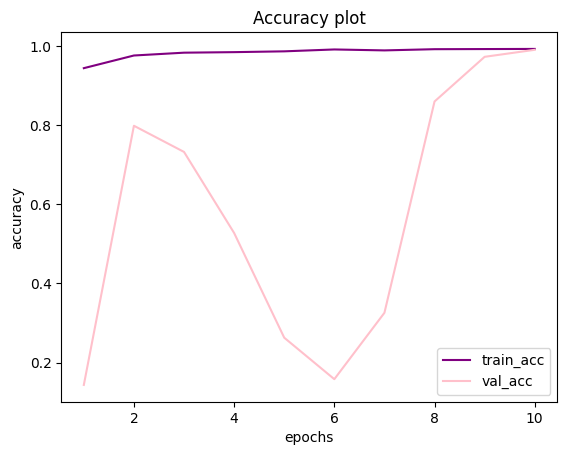

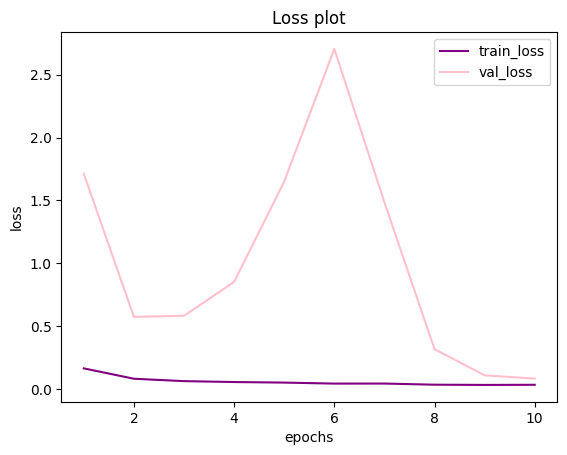

In [ ]:
epochs= range(1, len(history.history["accuracy"])+1)

plt.plot(epochs, history.history["accuracy"], color="purple")
plt.plot(epochs, history.history["val_accuracy"], color="pink")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Accuracy plot")
plt.legend(["train_acc", "val_acc"])
plt.show()

plt.plot(epochs, history.history["loss"], color="purple")
plt.plot(epochs, history.history["val_loss"], color="pink")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Loss plot")
plt.legend(["train_loss", "val_loss"])
plt.show()

In [ ]:
import numpy as np
prediction= model.predict(val_data, steps=np.ceil(val_data.samples/val_data.batch_size), verbose=1)
prediction= (prediction > 0.5)
prediction

32/32 [==============================] - 13s 360ms/step


array([[ True, False],
       [ True, False],
       [ True, False],
       ...,
       [False,  True],
       [False,  True],
       [False,  True]])

In [ ]:
val_labels=val_data.classes
val_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
pred1=[i[0] for i in prediction]
pred2=[i[1] for i in prediction]

0.9905660377358491
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       531
           1       0.96      0.98      0.97       105

    accuracy                           0.99       636
   macro avg       0.98      0.99      0.98       636
weighted avg       0.99      0.99      0.99       636



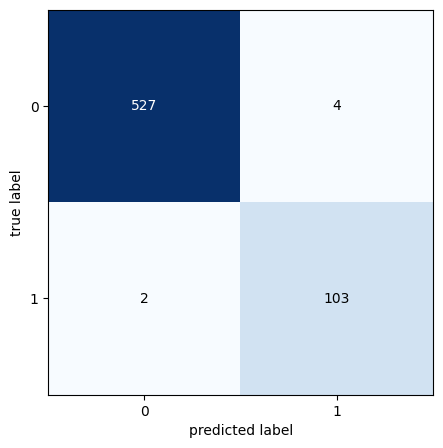

In [ ]:
cm= confusion_matrix(val_data.classes, pred2)
plot_confusion_matrix(cm, figsize=(5,5))

print(accuracy_score(val_data.classes, pred2))
print(classification_report(val_data.classes, pred2))

32/32 [==============================] - 5s 160ms/step


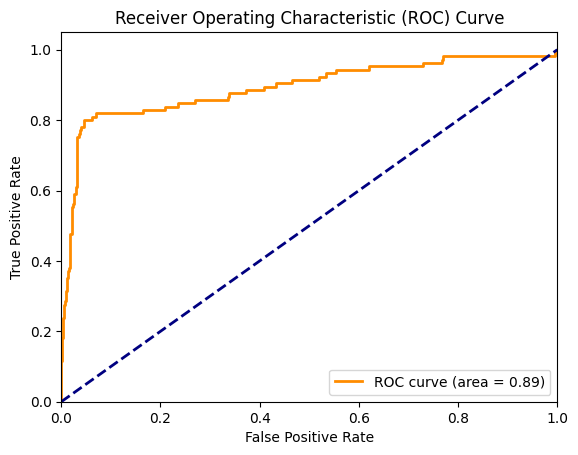

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for the positive class (tuberculosis)
y_pred_probs = model.predict(val_data, steps=np.ceil(val_data.samples/val_data.batch_size), verbose=1)[:, 1]

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(val_data.classes, y_pred_probs)

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


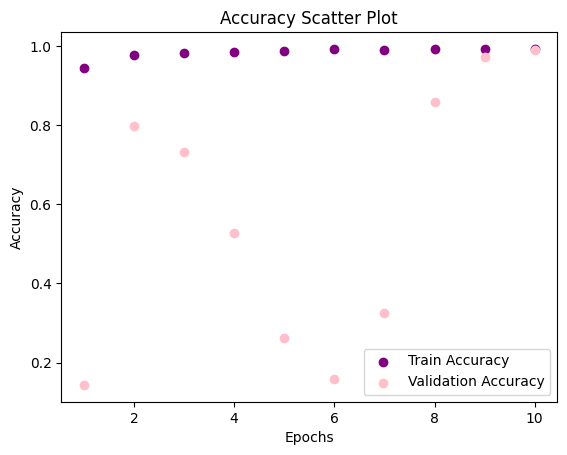

In [ ]:
plt.figure()
plt.scatter(epochs, history.history["accuracy"], color="purple", label="Train Accuracy")
plt.scatter(epochs, history.history["val_accuracy"], color="pink", label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Scatter Plot")
plt.legend()
plt.show()


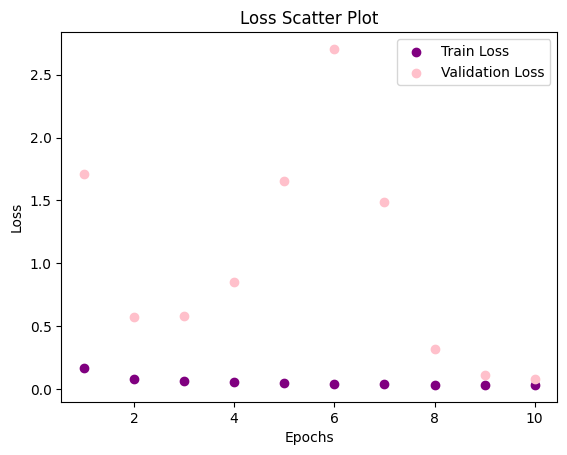

In [ ]:
plt.figure()
plt.scatter(epochs, history.history["loss"], color="purple", label="Train Loss")
plt.scatter(epochs, history.history["val_loss"], color="pink", label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Scatter Plot")
plt.legend()
plt.show()


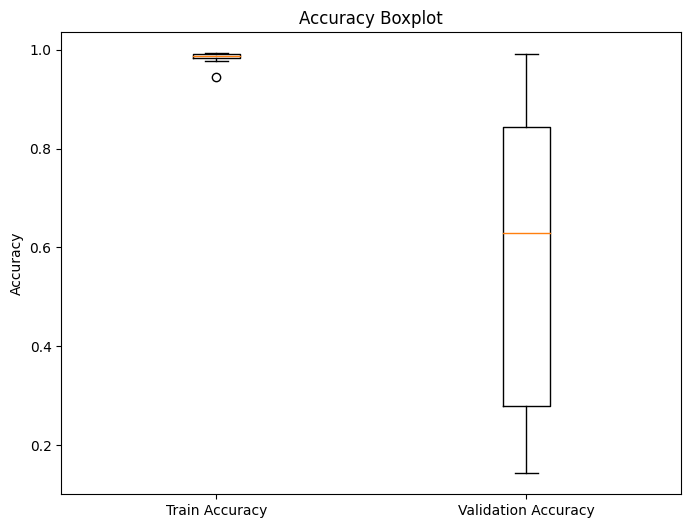

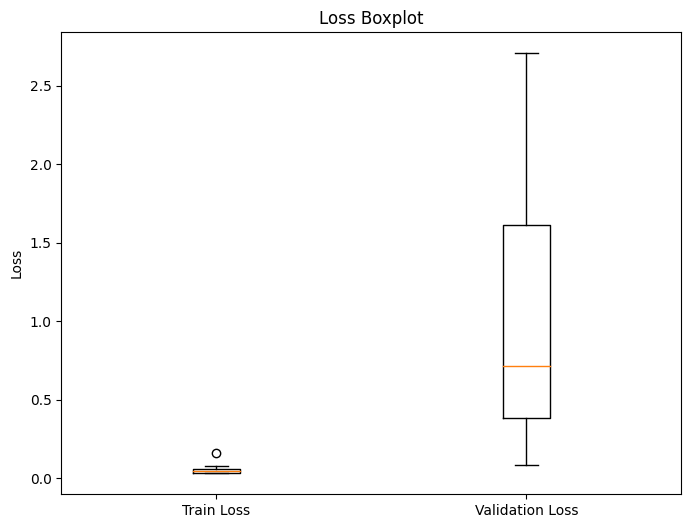

In [ ]:
# Combine the accuracy and loss values into a DataFrame
df = pd.DataFrame({'Train Accuracy': history.history["accuracy"],
                   'Validation Accuracy': history.history["val_accuracy"],
                   'Train Loss': history.history["loss"],
                   'Validation Loss': history.history["val_loss"]})

# Plot boxplots for accuracy and loss
plt.figure(figsize=(8, 6))
plt.boxplot([df['Train Accuracy'], df['Validation Accuracy']], labels=['Train Accuracy', 'Validation Accuracy'])
plt.ylabel("Accuracy")
plt.title("Accuracy Boxplot")
plt.show()

plt.figure(figsize=(8, 6))
plt.boxplot([df['Train Loss'], df['Validation Loss']], labels=['Train Loss', 'Validation Loss'])
plt.ylabel("Loss")
plt.title("Loss Boxplot")
plt.show()


In [ ]:
# Importing the metrics package from sklearn library
from sklearn import metrics
# Creating the confusion matrix
cm = metrics.confusion_matrix(val_data.classes, pred2)
# Assigning columns names
cm_df = pd.DataFrame(cm,
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
# Showing the confusion matrix
cm_df

,Predicted Negative,Predicted Positive
Actual Negative,527,4
Actual Positive,2,103


In [ ]:
# Creating a function to report confusion metrics
def confusion_metrics (conf_matrix):
# save confusion matrix and slice into four pieces
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)

    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))

    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy

    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))

    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}')
    print(f'Mis-Classification: {round(conf_misclassification,2)}')
    print(f'Sensitivity: {round(conf_sensitivity,2)}')
    print(f'Specificity: {round(conf_specificity,2)}')
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')

confusion_metrics(cm)

True Positives: 103
True Negatives: 527
False Positives: 4
False Negatives: 2
--------------------------------------------------
Accuracy: 0.99
Mis-Classification: 0.01
Sensitivity: 0.98
Specificity: 0.99
Precision: 0.99
f_1 Score: 0.99


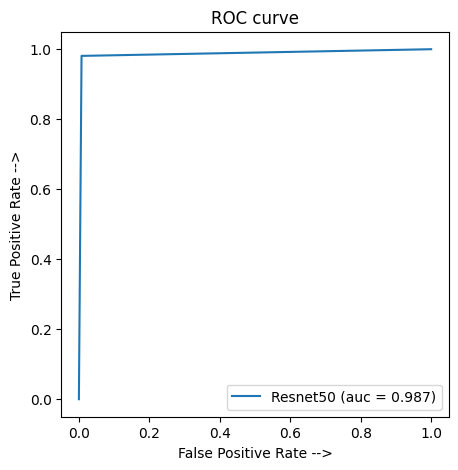

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(val_data.classes, pred2)
auc_resnet = auc(fpr, tpr)


plt.figure(figsize=(5, 5), dpi=100)
plt.plot(fpr, tpr, linestyle='-', label='Resnet50 (auc = %0.3f)' % auc_resnet)


plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()
plt.title("ROC curve")
plt.show()


In [ ]:
# Save the trained model to an HDF5 file
model.save('resnet_model.h5')

print("Model saved as 'resnet_model.h5'")


NotImplementedError: ignored

In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 70.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.2/298.2 kB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 9.5 MB/s eta 0:

In [ ]:
import gradio as gr

In [ ]:
class_names=['Normal','Tuberculosis']
def predict_image(img1):
  img1=img1.reshape(200,200,-1)
  img1 = tf.keras.utils.img_to_array(img1)
  img1 = np.expand_dims(img1, axis=0)
  img1 = img1/255
  prediction=model.predict(img1).flatten()
  print(prediction)
  for i in range(2):
    print(class_names[i],float(prediction[i]))

  return {class_names[i]: float(prediction[i]) for i in range(2)}

In [ ]:
image = gr.inputs.Image(shape=(200,200))
label = gr.outputs.Label(num_top_classes=2)

gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')

<ipython-input-35-fca27765645e>:1: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  image = gr.inputs.Image(shape=(200,200))
<ipython-input-35-fca27765645e>:1: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  image = gr.inputs.Image(shape=(200,200))
<ipython-input-35-fca27765645e>:2: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  label = gr.outputs.Label(num_top_classes=2)
<ipython-input-35-fca27765645e>:2: GradioUnusedKwargWarning: You have unused kwarg parameters in Label, please remove them: {'type': 'auto'}
  label = gr.outputs.Label(num_top_classes=2)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

[6.5911032e-04 9.9934083e-01]
Normal 0.0006591103156097233
Tuberculosis 0.999340832233429
Keyboard interruption in main thread... closing server.
